#### MIT License.  (C) 2017 by Andrew Lyasoff.

#### Jupyter notebook written in Julia 0.6.2. It implements the numerical program for computing the exercise boundary of an American-style call option described in Sec. 18.4 of my book "Stochastic Methods in Asset Pricing" (pp. 514-516). The same program is implemented in Python in Appendix B.3 of the book. The present implementation uses a single process and is about 4 times faster than the implementation in Python given in the book.

In [1]:
using SpecialFunctions

In [2]:
EC=(S,t,K,σ,r,δ)->(1/2)*sqrt(pi)*((erf(1/4*sqrt(2)*((σ^2 - 2*δ + 2*r)*t - 2*log(K/S))/(σ*sqrt(t)))*exp(-(δ - r)*t) + exp(-(δ - r)*t))*S + K*erf(1/4*sqrt(2)*((σ^2 + 2*δ - 2*r)*t + 2*log(K/S))/(σ*sqrt(t))) - K)*sqrt(t)*exp(-r*t)/sqrt(pi*t);
F=(ϵ,t,u,v,r,δ,σ)-> erf(ϵ/4*sqrt(2)*σ*sqrt(-t + u)-(1/2)*sqrt(2)*δ*sqrt(-t + u)/σ + (1/2)*sqrt(2)*r*sqrt(-t + u)/σ - (1/2)*sqrt(2)*log(v)/(σ*sqrt(-t + u)))+1;

In [3]:
K=40;σ=3/10;δ=7/100;r=2/100;T=1/2;

In [4]:
using Interpolations

In [5]:
Δ=T/5000
absc=0.0:Δ:T;
absc0=0.0:Δ:T-Δ;
val=[max(K,K*(r/δ)) for x in absc];
itp = interpolate(val, BSpline(Cubic(Natural())), OnGrid());
f=scale(itp,absc);
#f=t->fi[t];
ah=(t,z)->(exp(-δ*(z-t))*(δ/2)*F(1,t,z,f[z]/f[t],r,δ,σ));
bh=(t,z)->(exp(-r*(z-t))*(r*K/2)*F(-1,t,z,f[z]/f[t],r,δ,σ));

In [6]:
using Roots
using FastGaussQuadrature
nodes,weights=gausslegendre( 200 );

N.B.: $\int_a^bf(t)dt={1\over2}(b-a)\int_{-1}^{+1}f\bigl({1\over2}(b-a)s+{1\over2}(a+b)\bigr)d s$

In [7]:
global loc
global val
@time for iter=1:10
    #println(iter)
    loc=[max(K,K*(r/δ))]
    for ttt=T-Δ:-Δ:0.0
        #println(tt)
        #ttt=h(tt)
        an=map(s->(1/2)*(T-ttt)*ah(ttt,(1/2)*(T-ttt)*s+(1/2)*(ttt+T)),nodes);
        bn=map(s->(1/2)*(T-ttt)*bh(ttt,(1/2)*(T-ttt)*s+(1/2)*(ttt+T)),nodes);
        aaa=dot(weights,an);
        bbb=dot(weights,bn);
        LRT=fzero(x->x-K-EC(x,T-ttt,K,σ,r,δ)-aaa*x+bbb,K-1,K+15);
        loc=vcat([LRT],loc)
    end
    val=loc;
    #ff=f;
    itp=interpolate(val, BSpline(Cubic(Natural())), OnGrid());
    f=scale(itp,absc);
    #f=t->fi[t];
    ah=(t,z)->(exp(-δ*(z-t))*(δ/2)*F(1,t,z,f[z]/f[t],r,δ,σ));
    bh=(t,z)->(exp(-r*(z-t))*(r*K/2)*F(-1,t,z,f[z]/f[t],r,δ,σ));
    #println(iter)
end

 12.600319 seconds (554.58 M allocations: 9.490 GiB, 2.76% gc time)


In [8]:
using PyPlot

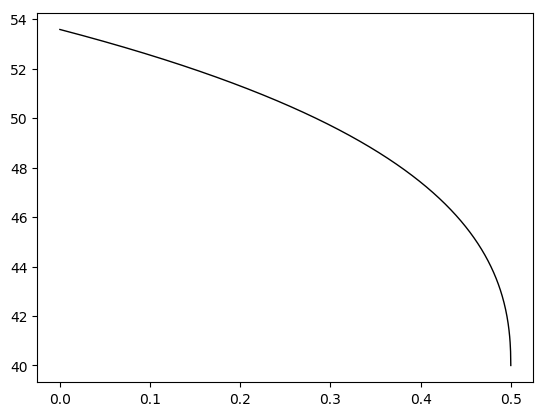

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fef9f545d10>

In [9]:
ff=t->f[t]
x = linspace(0.0,0.5,2000)
y = ff.(x)
plot(x, y, "k-", linewidth=1)

## Test if the fixed point solution has been attained

In [10]:
gg=ff

(::#21) (generic function with 1 method)

In [11]:
global loc
global val
@time for iter=1:5
    #println(iter)
    loc=[max(K,K*(r/δ))]
    for ttt=T-Δ:-Δ:0.0
        #println(tt)
        #ttt=h(tt)
        an=map(s->(1/2)*(T-ttt)*ah(ttt,(1/2)*(T-ttt)*s+(1/2)*(ttt+T)),nodes);
        bn=map(s->(1/2)*(T-ttt)*bh(ttt,(1/2)*(T-ttt)*s+(1/2)*(ttt+T)),nodes);
        aaa=dot(weights,an);
        bbb=dot(weights,bn);
        LRT=fzero(x->x-K-EC(x,T-ttt,K,σ,r,δ)-aaa*x+bbb,K-1,K+15);
        loc=vcat([LRT],loc)
    end
    val=loc;
    #ff=f;
    itp=interpolate(val, BSpline(Cubic(Natural())), OnGrid());
    f=scale(itp,absc);
    #f=t->fi[t];
    ah=(t,z)->(exp(-δ*(z-t))*(δ/2)*F(1,t,z,f[z]/f[t],r,δ,σ));
    bh=(t,z)->(exp(-r*(z-t))*(r*K/2)*F(-1,t,z,f[z]/f[t],r,δ,σ));
    #println(iter)
end

  6.421567 seconds (277.19 M allocations: 4.740 GiB, 4.25% gc time)


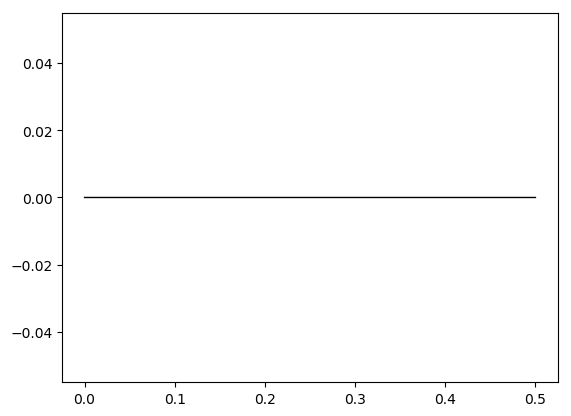

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fef9f3f13d0>

In [12]:
ff=t->(f[t]-gg(t))
x = linspace(0.0,0.5,2000)
y = ff.(x)
plot(x, y, "k-", linewidth=1)